,Unnamed: 0,2023_01_23_00_08_00,2023_01_23_00_09_00,2023_01_23_00_10_00,2023_01_23_00_11_00,2023_01_23_00_12_00,2023_01_23_00_13_00,2023_01_23_00_14_00,2023_01_23_00_15_00,2023_01_23_00_16_00,...,2023_01_23_23_58_00,2023_01_23_23_59_00,2023_01_24_00_00_00,2023_01_24_00_01_00,2023_01_24_00_02_00,2023_01_24_00_03_00,2023_01_24_00_04_00,2023_01_24_00_05_00,2023_01_24_00_06_00,2023_01_24_00_07_00
0,0.000000,102.194902,102.302933,106.216719,107.506861,107.969094,111.088362,114.307858,115.755640,116.720978,...,95.889638,98.805902,102.693695,106.419681,112.776022,112.595945,115.506843,117.703469,118.097866,117.641371
1,172.265625,106.232363,106.387239,112.149432,113.927778,114.156446,117.121486,120.142287,121.890837,122.993964,...,100.282891,102.955252,107.399062,111.060577,118.273338,118.374620,121.622494,123.333827,123.767792,122.709890
2,344.531250,114.214970,114.366684,119.976352,121.499545,121.588715,125.175451,128.365692,129.356793,129.350652,...,109.800378,112.394070,115.486439,119.879620,126.521053,126.662712,129.226521,130.450794,130.805963,130.341718
3,516.796875,119.651634,119.451139,122.891232,124.228065,124.721394,128.170088,131.158631,132.587572,132.585703,...,114.096644,116.690669,119.925052,124.080125,130.828088,130.329539,132.542192,134.746637,135.232860,135.229621
4,689.062500,118.820453,118.732881,121.868554,123.220246,124.498802,128.468223,131.296999,132.618283,133.552016,...,112.581899,116.666998,120.740827,124.443597,131.232816,130.529893,132.596868,134.726245,135.113237,134.928316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,21360.937500,61.460441,60.428424,60.718756,61.917528,61.206165,59.672970,60.890628,62.838567,64.190216,...,58.303631,58.255641,59.206279,64.474889,68.195082,68.637539,68.817114,68.587227,68.809811,68.416085
125,21533.203125,55.022581,53.852796,53.910810,55.189001,54.476370,53.076370,54.156233,56.221049,57.371212,...,51.809584,51.765811,52.807344,57.977708,61.703687,61.901062,62.196687,61.717563,61.914603,61.457636
126,21705.468750,46.724349,45.337447,45.331893,46.668569,45.924490,44.570220,45.597684,47.766139,48.633816,...,43.415456,43.420732,44.504015,49.599886,53.176959,53.090471,53.817367,53.060983,53.250769,52.596816
127,21877.734375,35.500426,34.134353,34.149076,35.486727,34.702237,33.333924,34.422495,36.578442,37.525583,...,32.323067,32.258106,33.462163,38.326069,41.711140,41.937154,42.573249,41.892935,41.935365,41.341809


C:\Users\Akshath\AppData\Local\Temp\ipykernel_13024\3446841117.py:229: UserWarning: The following kwargs were not used by contour: 'linewidth'
  im = ax.contourf(index, range(0,140,2), np.transpose(pdf), norm=colors.Normalize(vmin=vmin, vmax=vmax),


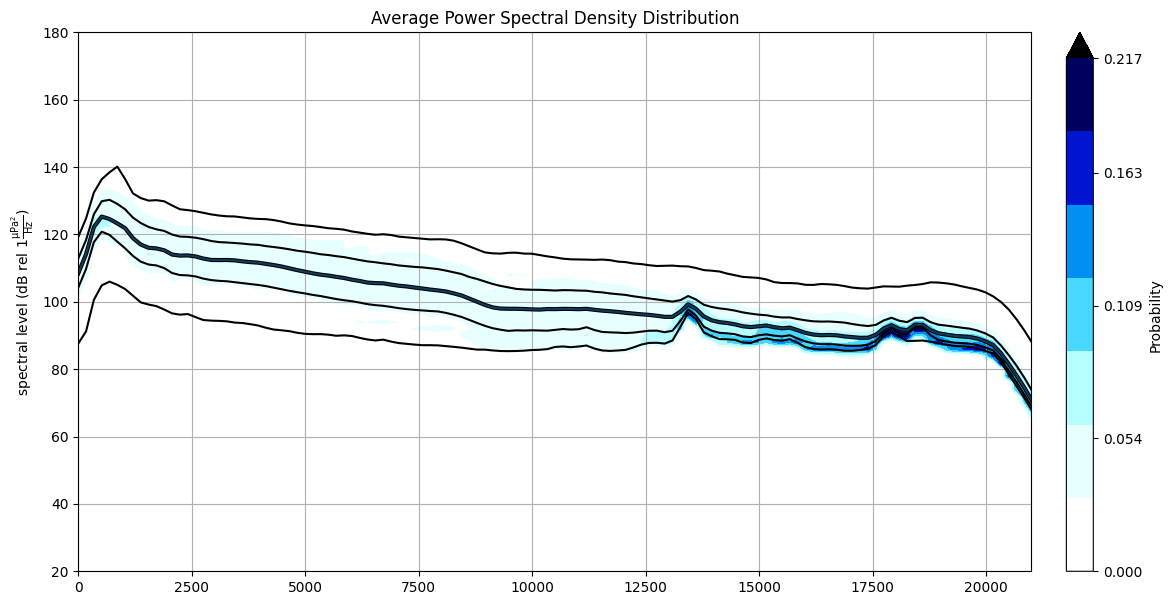

In [5]:
import matplotlib
import zipfile
import numpy as np
import pandas as pd
import xarray as xr
import hvplot.xarray
from tqdm import tqdm
import holoviews as hv
from bokeh.embed import json_item
from bokeh.plotting import figure
import json
from matplotlib import pyplot as plt
from io import BytesIO
import io
from matplotlib.backends.backend_agg import FigureCanvasAgg
import base64
import matplotlib.colors
from flask import send_file, jsonify
import hvplot.pandas
from holoviews import opts
from matplotlib.colors import Normalize
import matplotlib.colors as colors
from matplotlib.lines import Line2D



# # ***** generate graph *****
# def generateSPDF(startDate, endDate, base_data):
#     # starttime = pd.Timestamp(startDate)
#     # endtime = pd.Timestamp(endDate)
#     # base_data = specs[location]
#     spec_slice = base_data.loc[startDate:endDate, :]
#     spdf = get_spdf(spec_slice, fs_hz=200)
#     return plot_spdf(spdf, log=False)


# def get_spdf(spec, fs_hz, fmax=None, spl_bins=np.linspace(0, 120, 481),
#              percentiles=[1, 5, 10, 50, 90, 95, 99]):
#     if fmax is None:
#         fmax = 22050

#     n_freq_bin = int(130 * fmax/(fs_hz/2)) + 1

#     spdf_dct = {'freq': np.array(np.linspace(0, fmax, n_freq_bin)),
#                 'spl': spl_bins[:-1],
#                 'pdf': np.empty((n_freq_bin, 480)),
#                 'number_psd': 5}

#     for p in percentiles:
#         spdf_dct[str(p)] = np.empty(n_freq_bin)

#     for idx, freq_bin in enumerate(tqdm(spec.values.transpose()[:n_freq_bin - 1])):
#         hist, _ = np.histogram(freq_bin, bins=spl_bins, density=True)
#         spdf_dct['pdf'][idx] = hist
#         spdf_dct['50'][idx] = np.median(freq_bin)
#         for p in percentiles:
#             spdf_dct[str(p)][idx] = np.nanquantile(freq_bin, p/100)

#     return spdf_dct


# def plot_spdf(spdf, vmin=0.003, vmax=0.2, vdelta=0.0025, save=False, filename=None, log=True, title='Spectral PDF'):
#     cbarticks = np.arange(vmin, vmax+vdelta, vdelta)
#     fig, ax = plt.subplots(figsize=(9, 5))
#     im = ax.contourf(spdf['freq'], spdf['spl'], np.transpose(spdf['pdf']),
#                      cbarticks, norm=colors.Normalize(vmin=vmin, vmax=vmax),
#                      cmap='jet', extend='max', alpha=0.50, linewidth=0)

#     # plot some percentiles:
#     plt.plot(spdf['freq'], spdf['1'], color='black')
#     plt.plot(spdf['freq'], spdf['5'], color='black')
#     plt.plot(spdf['freq'], spdf['10'], color='black')
#     plt.plot(spdf['freq'], spdf['50'], color='black')
#     plt.plot(spdf['freq'], spdf['90'], color='black')
#     plt.plot(spdf['freq'], spdf['95'], color='black')
#     plt.plot(spdf['freq'], spdf['99'], color='black')

#     plt.ylabel(r'spectral level (dB rel $1 \mathrm{\frac{μ Pa^2}{Hz}}$)')
#     plt.xlabel('frequency (Hz)')
#     plt.ylim([36, 100])
#     plt.xlim([0, 90])
#     if log:
#         plt.xscale('log')

#     plt.colorbar(im, ax=ax, ticks=[vmin, vmin + (vmax-vmin)/4, vmin + (vmax-vmin)/2,
#                  vmin + 3*(vmax-vmin)/4,  vmax],  pad=0.03, label='probability', format='%.3f')
#     plt.tick_params(axis='y')
#     plt.grid(True)
#     plt.title(title)
#     handles, labels = plt.gca().get_legend_handles_labels()
#     line = Line2D(
#         [0], [0], label='percentiles: 1, 5, 10, 50, 90, 95, 99', color='k')
#     handles.extend([line])
#     plt.legend(handles=handles, loc='upper right')
#     plt.tight_layout()
#     plt.xlim((200/512, 100))
#     my_stringIObytes = io.BytesIO()
#     plt.draw()
#     plt.show()
#     plt.savefig(my_stringIObytes, format='jpg')
#     my_stringIObytes.seek(0)
#     img_base64 = base64.b64encode(my_stringIObytes.read())
#     return jsonify({'image': str(img_base64)})

# # ***** get download *****
# def generateCsvSPDF(spec_slice):
#     spdf = get_spdf(spec_slice, fs_hz=200)
#     freq = spdf['freq']
#     L1 = spdf['1']
#     L5 = spdf['5']
#     L10 = spdf['10']
#     L50 = spdf['50']
#     L90 = spdf['90']
#     L95 = spdf['95']
#     L99 = spdf['99']
#     spdf_df = pd.DataFrame(zip(freq, L1, L5, L10, L50, L90, L95, L99), columns=[
#                            'Frequency', 'Level 1', 'Level 5', 'Level 10', 'Level 50', 'Level 90', 'Level 95', 'Level 99'])
#     csv = spdf_df.to_csv(index=False)
#     return csv
#     # spdf_df = spdf_df.fillna(0)
#     # spdf_dict = spdf_df.to_dict('records')
#     # return jsonify({"data": spdf_dict})

# df = pd.read_csv('230123'+'.csv')

# index = df[df.columns[0]].values.tolist()
# generateSPDF("2023_01_29_00_05_00","2023_01_29_00_10_00",df)
# get_spdf(df,44100)


df = pd.read_csv('./dataStorage/'+'230123'+'.csv')


# index = df["Frequency"].to_numpy()
index = df[df.columns[0]].to_numpy()

# target_data_1 = df.loc[:, "2023_01_23_22_30_00":"2023_01_23_22_32_00"]
# target_data_2 = df.loc[:, "2023_01_23_23_30_00":"2023_01_23_23_32_00"]
# target_data = df.loc[:, "2023_01_24_03_30_00":"2023_01_24_04_00_00"]
# display(target_data_1)
# display(target_data_2)
# target_data = target_data_1 + target_data_2


target_data  = df.loc[:, "2023_01_23_21_07_00":"2023_01_23_22_47_00"]
target_data = df
display(target_data)
# frames = [target_data_1,target_data_2]
# target_data = pd.concat(frames)
# print(target_data)
target_np = target_data.to_numpy()

# zero_np = zero_data.to_numpy()

# getting each quantile


quantile_50 = np.quantile(target_data, 0.5,axis=1)

quantile_25 = np.quantile(target_data, 0.25, axis = 1)

quantile_1 = np.quantile(target_data, 0.01, axis = 1)

quantile_75 = np.quantile(target_data, 0.75,axis=1)

quantile_99 = np.quantile(target_data, 0.99,axis=1)

avg = np.mean(target_data,axis=1)

# getting the pdf of graph
zqut50 = np.empty(129)
pdf = np.empty((129,70))
qut1 = np.empty(129)
qut25 = np.empty(129)
qut50 = np.empty(129)
qut75 = np.empty(129)
qut99 = np.empty(129)

for i in range(0,129):
    hist, bins = np.histogram(target_data.loc[i,:], bins=70, density=True, range=(0,140))
    pdf[i] = hist
    qut1[i] = np.quantile(target_data.loc[i,:],0.01)
    qut25[i] = np.quantile(target_data.loc[i,:],0.25)
    qut50[i] = np.quantile(target_data.loc[i,:],0.5)
    qut75[i] = np.quantile(target_data.loc[i,:],0.75)
    qut99[i] = np.quantile(target_data.loc[i,:],0.99)
# print(bins)



vmin = float(np.min(pdf))
vmax = float(np.max(pdf))

fig, ax = plt.subplots(figsize=(15,7))

plt.plot(index, quantile_50, color= "black", linewidth = 3)
# plt.plot(index, quantile_25, color = "black")
# plt.plot(index, quantile_1, color = "black")
# plt.plot(index, quantile_99, color = "black")
# plt.plot(index, quantile_75, color = "black")
#"#FFFFFF",'#FCFBF9','#D7DCEA','#A1B3D7',"#6581BF","#2F57AB","#0B389D"

testcmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom", [
    "#ffffff",
    "#ffffff",
    "#ffffff",
"#efffff",
"#efffff",
"#e0ffff",
"#d0ffff",
"#c1ffff",
"#acfcff",
"#85eeff",
"#5fe0ff",
"#39d2ff",
"#13c4ff",
"#00a9f9",
"#0081ee",
"#005ae3",
"#0032d8",
"#000acd",
"#0000aa",
"#000080",
"#000055",
"#00002b",
"#000000"
])
#index is the frequency, range function represent the range of DB, pdf is probability
im = ax.contourf(index, range(0,140,2), np.transpose(pdf), norm=colors.Normalize(vmin=vmin, vmax=vmax),
                     cmap=testcmap, extend='max', alpha=1, linewidth=1)
# plt.imshow(im, cmap=plt.get_cmap('Purples',6))
# plt.clim(-1,1)


plt.colorbar(im, ax=ax, ticks=[vmin, vmin + (vmax-vmin)/4, vmin + (vmax-vmin)/2,
                 vmin + 3*(vmax-vmin)/4,  vmax],  pad=0.03,cmap = testcmap, label='Probability', format='%.3f')
# set(plt,'Color','#0B389D')

plt.tick_params(axis='y')
plt.errorbar(index, quantile_50,
       alpha=0.5,
       ecolor='black',
       capsize=10)
plt.grid(True)
plt.title("Average Power Spectral Density Distribution")
plt.ylim(20,180)
plt.xlim(0,21000)
plt.ylabel(r'spectral level (dB rel $1 \mathrm{\frac{μ Pa^2}{Hz}}$)')
  # ax2 = ax.twinx()
  # ax2.plot(t_vector[0:int(s2*fs)-int(s1*fs)], ratio_norm[int(s1*fs):int(s2*fs)],'k',linewidth=1) #the black area at the middle**
  # plt.ylim(-0.5,0.2)
  # plt.yticks(np.arange(-0.4, 0.202, step=0.25))
plt.draw()
plt.show()
plt.rcParams.update({'font.size': 10})

# print(20*np.log10(1e-6))